# Lista 05 Visão Computacional - Matheus Carvalho

In [6]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

## Questão 01

### Alternativa A

Fonte: https://youtu.be/vgSmxhXXF_4?si=0KhKvmlqECnQNLOL

![Harris](images/harris_formula.jpeg)

In [7]:
def HarrisCornerDetector(image, blockSize, ksize, k=0.06):
    """
    Calcula o score de Harris para cada ponto da imagem.

    Args:
        image (numpy.ndarray): A imagem em tons de cinza onde os scores de canto serão calculados.
        blockSize (int): O tamanho da vizinhança considerada para a detecção de cada canto.
        ksize (int): O tamanho do filtro de Sobel usado para calcular os gradientes horizontal e vertical.
        k (float): Um parâmetro livre do detector de Harris na equação. O padrão é 0.06.

    Returns:
        numpy.ndarray: Uma imagem com o score de Harris para cada pixel.
    
    Esta função funciona calculando os gradientes horizontal e vertical da imagem usando o filtro de Sobel,
    em seguida, calcula os produtos dos gradientes e, finalmente, usa essas informações para calcular o score
    de Harris para cada pixel.
    """
    
    # vai pegar o shape da imagem
    nlin, ncol = image.shape
    
    # vai converter os dados para float e normalizar (colocando os valores entre 0 e 1)
    image = np.float32(image) / 255
    
    # calcula o gradinente (fazendo a convolução com os filtros de sobel para derivada horizontal e vertical)
    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    
    # calculos necessários com os resultados da convolução (vai elevar os elementos ao quadrado, mas também vai multiplicar as duas matrizes element-wise)
    Ix2 = Ix ** 2 
    Iy2 = Iy ** 2
    Ixy = Ix * Iy
    
    # inicializa uma matriz do mesmo tamanho da imagem
    Rresult = np.zeros((nlin, ncol))
    
    # vai iterar sobre cada pixel da imagem
    for lin in range(blockSize, nlin - blockSize):
        for col in range(blockSize, ncol - blockSize):
            
            # vai extrair uma parte da matriz centrada no pixel em questão
            Ix2_block = Ix2[lin - blockSize:lin + blockSize + 1, col - blockSize:col + blockSize + 1]
            Iy2_block = Iy2[lin - blockSize:lin + blockSize + 1, col - blockSize:col + blockSize + 1]
            Ixy_block = Ixy[lin - blockSize:lin + blockSize + 1, col - blockSize:col + blockSize + 1]
            
            # vai somar o valor dos blocos
            Sxx = np.sum(Ix2_block)
            Syy = np.sum(Iy2_block)
            Sxy = np.sum(Ixy_block)
            
            # faz o calculo do determinante e do traço
            # como se fosse o determinante da matriz H
            det = Sxx * Syy - Sxy ** 2
            trace = Sxx + Syy
            
            # aplica a fórmula da imagem
            R = det - k * (trace ** 2)
            # atualiza o valor do pixel em questão na matriz temporária
            Rresult[lin, col] = R
            
    return Rresult

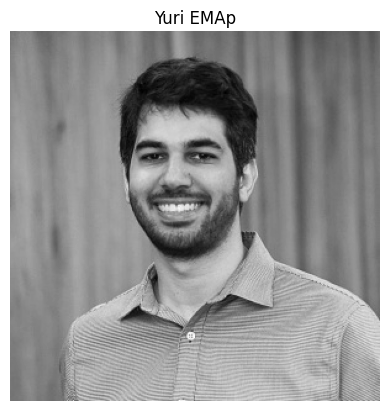

In [32]:
yuri = Image.open('images/yuri.jpg')
yuri = yuri.convert('L')
yuri = np.array(yuri)
plt.title("Yuri EMAp")
plt.imshow(yuri, cmap='gray')
plt.axis('off')
plt.show()

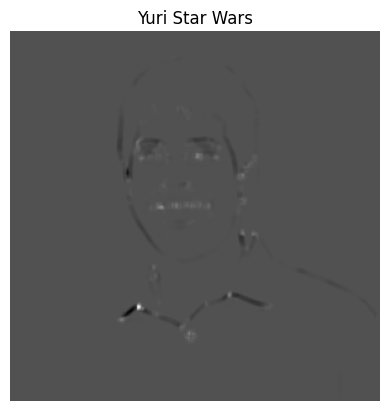

In [33]:
yuri = HarrisCornerDetector(yuri, 2, 5)
plt.title("Yuri Star Wars")
plt.imshow(yuri, cmap='gray')
plt.axis('off')
plt.show()

### Alternativa B

Fonte: https://youtu.be/v6lt0cGSHBI?si=dXYOtFSXD942fwnq

In [10]:
def NonMaximalSupression(im, window_size=3):
    """
    Aplica Supressão de Não Máximos (Non-Maximal Suppression) em uma imagem para encontrar máximos locais.

    Args:
        im (numpy.ndarray): A imagem de entrada (array 2D) onde os scores de canto são calculados.
        window_size (int): O tamanho da janela a ser considerada para a supressão de máximos locais. O padrão é 3.

    Returns:
        numpy.ndarray: Uma imagem binária com a mesma forma da imagem de entrada `im` onde os máximos locais são preservados
                       e outros valores são definidos como zero.
    
    Esta função funciona deslizando uma janela de tamanho `window_size` x `window_size` sobre a imagem. Para cada
    pixel, ela verifica se o valor do pixel é o máximo dentro da janela. Se for, o valor do pixel é mantido;
    caso contrário, ele é definido como zero.
    """
    # vai pegar o número de linhas e o número de colunas
    nl, nc = im.shape
    
    # uma matriz de zeros da mesma forma que a matriz de entrada
    maximos = np.zeros_like(im)
    
    # vai percorrer os pixels da imagem excluindo os da borda
    for lin in range(window_size, nl - window_size):
        for col in range(window_size, nc - window_size):
            # faz uma extração temporária de um determinado número de pixels
            window = im[lin - window_size:lin + window_size + 1, col - window_size:col + window_size + 1]
            # verifica se o pixel em questão é o máximo ou não
            if im[lin, col] == np.max(window):
                # se sim, adiciona no array que será retornado
                maximos[lin, col] = im[lin, col]
    
    return maximos

### Alternativa C

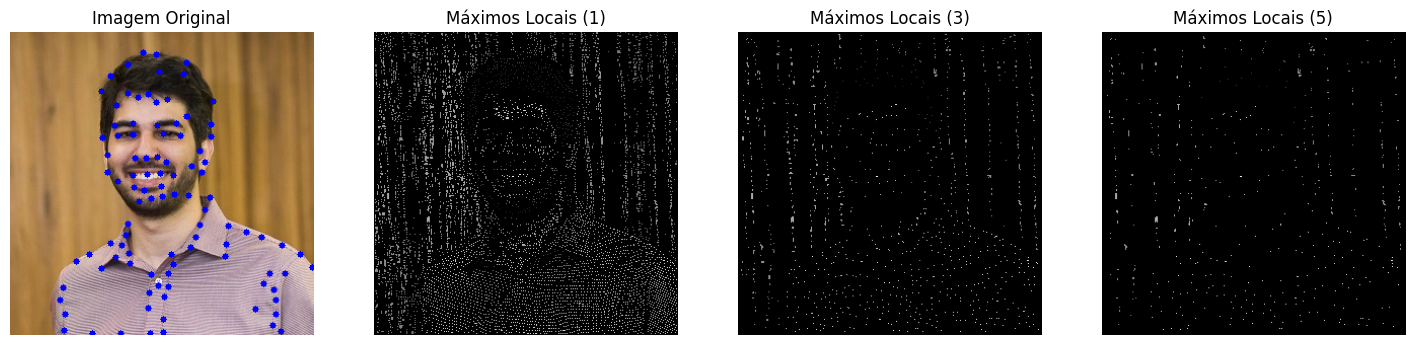

In [60]:
img = cv2.imread('images/yuri.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

corners = np.int_(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Imagem Original')
plt.axis('off') 

plt.subplot(1, 4, 2)
plt.imshow(NonMaximalSupression(yuri, 1), cmap='gray')
plt.title('Máximos Locais (1)')
plt.axis('off')  

plt.subplot(1, 4, 3)
plt.imshow(NonMaximalSupression(yuri, 3), cmap='gray')
plt.title('Máximos Locais (3)')
plt.axis('off')  

plt.subplot(1, 4, 4)
plt.imshow(NonMaximalSupression(yuri, 5), cmap='gray')
plt.title('Máximos Locais (5)')
plt.axis('off')  

plt.show()

Os resultado foram diferentes, como já era esperado. De fato, ambos conseguem delimitar os limiter e corners de uma imagem, mas cada uma do seu jeito. Quanto olhamos para o resultado da minha implementação, temos diferentes resultados para diferentes "window_size". Acima, plotei três testes diferentes e, a partir deles, podemos tirar algumas conclusões. 

Sem dúvida, quanto menor a "window_size", mais detalhada fica a imagem e os limites. Acredito que, o primeiro teste tá sensível demais e acaba captando detalhes não tão interessantes. O último peca no extremo oposto, com pouco detalhe. Por isso, acredito que o melhor resultado foi o intermediário.

Ele conta com mais pontos, mas veja que tanto o resultado do OpenCV consegue determinar os limites da camisa por exemplo, assim como a nossa implementação. Porém, mesmo assim, o nosso ainda é muito sensível aos detalhes na parede que, claramente, não representam limites de nada e deveriam passar despercebidos. 

## Quesão 02

## Questão 03

## Questão 04